Feature_Importance_Distribution_AllTech_seaborn_dist

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from bokeh.charts import Scatter, Bar, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
import seaborn as sns

In [2]:
df = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Oct272017_ML_w_AllTech/data/train_test_data/train_data_balanced.csv')
f = pd.read_csv('/Users/lmc2/NIST/Notebooks/SVanalyzer_ML/DEL/results/General/feature_importance.csv')
f_100 = pd.read_csv('/Users/lmc2/NIST/Notebooks/SVanalyzer_ML/DEL/results/General/feature_importance_100.csv')
f_300 = pd.read_csv('/Users/lmc2/NIST/Notebooks/SVanalyzer_ML/DEL/results/General/feature_importance_300.csv')
f_500 = pd.read_csv('/Users/lmc2/NIST/Notebooks/SVanalyzer_ML/DEL/results/General/feature_importance_500.csv')

In [3]:
df_100 = df[['pacbio.ref_count','Ill300x.ref_count','pacbio.alt_alnScore_std','Ill250.alt_count','pacbio.alt_insertSize_std','Ill300x.ref_reason_alignmentScore','pacbio.alt_reason_alignmentScore','pacbio.alt_count','pacbio.alt_insertSize_mean','Ill250.ref_reason_alignmentScore','pacbio.ref_reason_alignmentScore','Ill300x.alt_reason_alignmentScore','pacbio.ref_alnScore_std','pacbio.alt_alnScore_mean','Ill250.alt_alnScore_std','Ill300x.alt_insertSize_std','pacbio.ref_insertSize_std','Ill250.alt_reason_alignmentScore','Ill250.alt_alnScore_mean','Ill250.alt_insertSize_std','Ill250.ref_count','pacbio.ref_alnScore_mean','Ill300x.alt_count','IllMP.ref_count','Ill250.ref_insertSize_std','pacbio.ref_insertSize_mean','IllMP.ref_reason_alignmentScore','TenX.HP2_ref_count','IllMP.alt_insertSize_mean','IllMP.alt_reason_alignmentScore', 'GTcons']]
df_300 = df[['Ill300x.ref_reason_alignmentScore','Ill300x.ref_count','Ill250.alt_count','Ill250.alt_reason_alignmentScore','pacbio.ref_count','pacbio.alt_alnScore_std','pacbio.alt_reason_alignmentScore','Ill250.ref_reason_alignmentScore','pacbio.alt_count','Ill250.ref_count', 'GTcons']]
df_500 = df[['Ill300x.ref_count','Ill300x.ref_reason_alignmentScore','Ill250.alt_reason_alignmentScore','Ill250.alt_count','pacbio.alt_reason_alignmentScore','pacbio.ref_count','pacbio.alt_count','pacbio.ref_reason_alignmentScore','Ill250.ref_reason_alignmentScore','pacbio.alt_alnScore_std','GTcons']]

In [4]:
# df_100 = df[['Ill300x.ref_reason_alignmentScore','pacbio.alt_alnScore_std','Ill250.alt_count','Ill300x.ref_count','pacbio.ref_count','pacbio.alt_insertSize_mean','pacbio.alt_insertSize_std','pacbio.ref_alnScore_std','Ill250.ref_reason_alignmentScore','Ill250.alt_reason_alignmentScore', 'GTcons']]
# df_300 = df[['Ill300x.ref_reason_alignmentScore','Ill300x.ref_count','Ill250.alt_count','Ill250.alt_reason_alignmentScore','pacbio.ref_count','pacbio.alt_alnScore_std','pacbio.alt_reason_alignmentScore','Ill250.ref_reason_alignmentScore','pacbio.alt_count','Ill250.ref_count', 'GTcons']]
# df_500 = df[['Ill300x.ref_count','Ill300x.ref_reason_alignmentScore','Ill250.alt_reason_alignmentScore','Ill250.alt_count','pacbio.alt_reason_alignmentScore','pacbio.ref_count','pacbio.alt_count','pacbio.ref_reason_alignmentScore','Ill250.ref_reason_alignmentScore','pacbio.alt_alnScore_std','GTcons']]

In [5]:
df_100['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_100['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_100['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_300['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_300['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_300['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_500['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_500['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_500['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


**NOTE:**
    There was 1 NA value in each feature column and each was dropped to create the plot

** Top 10: F 100 **

In [6]:
df_100_ = df_100.dropna()

In [7]:
# df_.isnull().sum()

[resource for the following](https://youtu.be/v_sPnwoT_iA?t=1144)
[color pallate](https://youtu.be/v_sPnwoT_iA?t=1259)

In [8]:

sns.set_style("white")

In [9]:
# Select Features for comparison
# Feature 1
hom_var_1 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill300x.ref_reason_alignmentScore']
het_var_1 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill300x.ref_reason_alignmentScore']
hom_ref_1 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill300x.ref_reason_alignmentScore']

# Feature 2
hom_var_2 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_alnScore_std']
het_var_2 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_alnScore_std']
hom_ref_2 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_alnScore_std']

# Feature 3
hom_var_3 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill250.alt_count']
het_var_3 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill250.alt_count']
hom_ref_3 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill250.alt_count']

# Feature 4
hom_var_4 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill300x.ref_count']
het_var_4 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill300x.ref_count']
hom_ref_4 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill300x.ref_count']

# Feature 5
hom_var_5 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.ref_count']
het_var_5 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.ref_count']
hom_ref_5 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.ref_count']

# Feature 6
hom_var_6 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_insertSize_mean']
het_var_6 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_insertSize_mean']
hom_ref_6 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_insertSize_mean']

# Feature 7
hom_var_7 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_insertSize_std']
het_var_7 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_insertSize_std']
hom_ref_7 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_insertSize_std']

# Feature 8
hom_var_8 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.ref_alnScore_std']
het_var_8 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.ref_alnScore_std']
hom_ref_8 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.ref_alnScore_std']

# Feature 9
hom_var_9 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill250.ref_reason_alignmentScore']
het_var_9 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill250.ref_reason_alignmentScore']
hom_ref_9 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill250.ref_reason_alignmentScore']

# Feature 10
hom_var_10 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill250.alt_reason_alignmentScore']
het_var_10 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill250.alt_reason_alignmentScore']
hom_ref_10 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill250.alt_reason_alignmentScore']

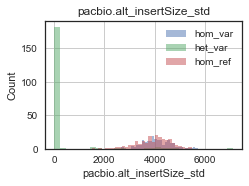

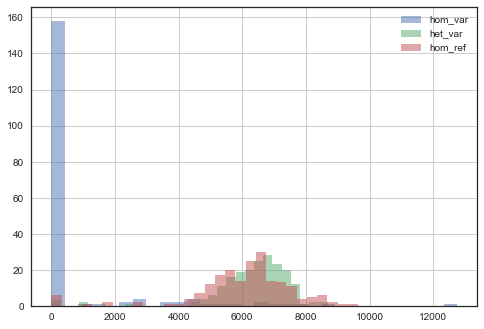

In [10]:
fig = plt.figure(figsize=(12,8))

# Feature 7
ax7 = fig.add_subplot(337)
ax7.set_xlabel('pacbio.alt_insertSize_std')
ax7.set_ylabel('Count')
ax7.set_title('pacbio.alt_insertSize_std')
hom_var_7.hist(alpha = 0.5, bins = 30, label='hom_var')
het_var_7.hist(alpha = 0.5, bins = 30, label='het_var')
hom_ref_7.hist(alpha = 0.5, bins = 30, label='hom_ref')

plt.legend(loc = 'upper right')
plt.show()

# Feature 8
ax8 = fig.add_subplot(338)
ax8.set_xlabel('pacbio.ref_alnScore_std')
ax8.set_ylabel('Count')
ax8.set_title('pacbio.ref_alnScore_std')
hom_var_8.hist(alpha = 0.5, bins = 30, label='hom_var')
het_var_8.hist(alpha = 0.5, bins = 30, label='het_var')
hom_ref_8.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')
plt.show()

# Feature 9
ax1 = fig.add_subplot(339)
hom_var_9.hist(alpha = 0.5, bins = 30, label='hom_var')
ax1.set_xlabel('Ill250.ref_reason_alignmentScore')
ax1.set_ylabel('Count')
ax1.set_title('Ill250.ref_reason_alignmentScore')

ax1 = fig.add_subplot(339)
het_var_9.hist(alpha = 0.5, bins = 30, label='het_var')

ax1 = fig.add_subplot(339)
hom_ref_9.hist(alpha = 0.5, bins = 30, label='hom_ref')



# # Feature 10
# ax3 = fig.add_subplot(331)
# ax3.set_xlabel('Ill250.alt_reason_alignmentScore')
# ax3.set_ylabel('Count')
# ax3.set_title('Ill250.alt_reason_alignmentScore')
# hom_var_10.hist(alpha = 0.5, bins = 30, label='hom_var')
# het_var_10.hist(alpha = 0.5, bins = 30, label='het_var')
# hom_ref_10.hist(alpha = 0.5, bins = 30, label='hom_ref')
# plt.legend(loc = 'upper right')
# plt.show()

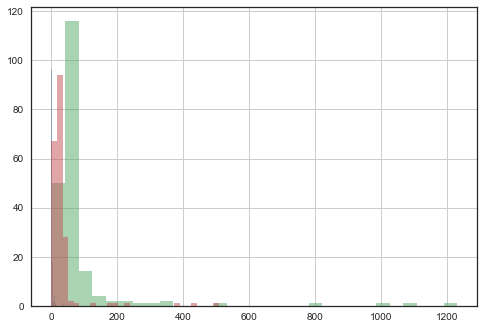

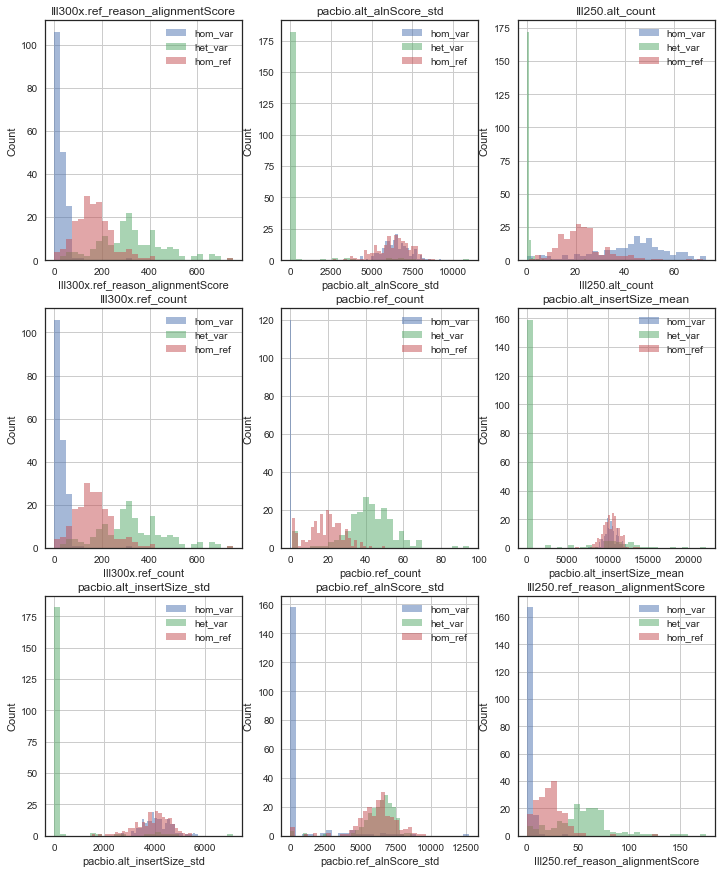

In [11]:
fig = plt.figure(figsize=(12,15))

# Feature 1 - Range adjusted to show distribution!!!
ax1 = fig.add_subplot(331)
ax1.grid(False)
hom_var_1.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_var')
ax1.set_xlabel('Ill300x.ref_reason_alignmentScore')
ax1.set_ylabel('Count')
ax1.set_title('Ill300x.ref_reason_alignmentScore')

ax1 = fig.add_subplot(331)
het_var_1.hist(alpha = 0.5, bins = 30, range=(0, 750), label='het_var')

ax1 = fig.add_subplot(331)
hom_ref_1.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 2
ax2 = fig.add_subplot(332)
hom_var_2.hist(alpha = 0.5, bins = 30, label='hom_var')
ax2.set_xlabel('pacbio.alt_alnScore_std')
ax2.set_ylabel('Count')
ax2.set_title('pacbio.alt_alnScore_std')

ax2 = fig.add_subplot(332)
het_var_2.hist(alpha = 0.5, bins = 30, label='het_var')

ax2 = fig.add_subplot(332)
hom_ref_2.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 3
ax3 = fig.add_subplot(333)
hom_var_3.hist(alpha = 0.5, bins = 30, label='hom_var')
ax3.set_xlabel('Ill250.alt_count')
ax3.set_ylabel('Count')
ax3.set_title('Ill250.alt_count')

ax3 = fig.add_subplot(333)
het_var_3.hist(alpha = 0.5, bins = 30, label='het_var')

ax3 = fig.add_subplot(333)
hom_ref_3.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 4 - Range adjusted to show distribution!!
ax4 = fig.add_subplot(334)
hom_var_4.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_var')
ax4.set_xlabel('Ill300x.ref_count')
ax4.set_ylabel('Count')
ax4.set_title('Ill300x.ref_count')

ax4 = fig.add_subplot(334)
het_var_4.hist(alpha = 0.5, bins = 30, range=(0, 750), label='het_var')

ax4 = fig.add_subplot(334)
hom_ref_4.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 5
ax5 = fig.add_subplot(335)
hom_var_5.hist(alpha = 0.5, bins = 30, label='hom_var')
ax5.set_xlabel('pacbio.ref_count')
ax5.set_ylabel('Count')
ax5.set_title('pacbio.ref_count')

ax5 = fig.add_subplot(335)
het_var_5.hist(alpha = 0.5, bins = 30, label='het_var')

ax5 = fig.add_subplot(335)
hom_ref_5.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 6
ax6 = fig.add_subplot(336)
hom_var_6.hist(alpha = 0.5, bins = 30, label='hom_var')
ax6.set_xlabel('pacbio.alt_insertSize_mean')
ax6.set_ylabel('Count')
ax6.set_title('pacbio.alt_insertSize_mean')

ax6 = fig.add_subplot(336)
het_var_6.hist(alpha = 0.5, bins = 30, label='het_var')

ax6 = fig.add_subplot(336)
hom_ref_6.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 7
ax7 = fig.add_subplot(337)
hom_var_7.hist(alpha = 0.5, bins = 30, label='hom_var')
ax7.set_xlabel('pacbio.alt_insertSize_std')
ax7.set_ylabel('Count')
ax7.set_title('pacbio.alt_insertSize_std')

ax7 = fig.add_subplot(337)
het_var_7.hist(alpha = 0.5, bins = 30, label='het_var')

ax7 = fig.add_subplot(337)
hom_ref_7.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 8
ax8 = fig.add_subplot(338)
hom_var_8.hist(alpha = 0.5, bins = 30, label='hom_var')
ax8.set_xlabel('pacbio.ref_alnScore_std')
ax8.set_ylabel('Count')
ax8.set_title('pacbio.ref_alnScore_std')

ax8 = fig.add_subplot(338)
het_var_8.hist(alpha = 0.5, bins = 30, label='het_var')

ax8 = fig.add_subplot(338)
hom_ref_8.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 9 - NOTE: The range has been changed to see distribution!!
ax9 = fig.add_subplot(339)
hom_var_9.hist(alpha = 0.5, bins = 30, range=(0, 175), label='hom_var')
ax9.set_xlabel('Ill250.ref_reason_alignmentScore')
ax9.set_ylabel('Count')
ax9.set_title('Ill250.ref_reason_alignmentScore')

ax9 = fig.add_subplot(339)
het_var_9.hist(alpha = 0.5, bins = 30, range=(0, 175), label='het_var')

ax9 = fig.add_subplot(339)
hom_ref_9.hist(alpha = 0.5, bins = 30, range=(0, 175), label='hom_ref')
plt.legend(loc = 'upper right')

plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/top_10feat_adjrange_.png', bbox_inches='tight')
plt.show()


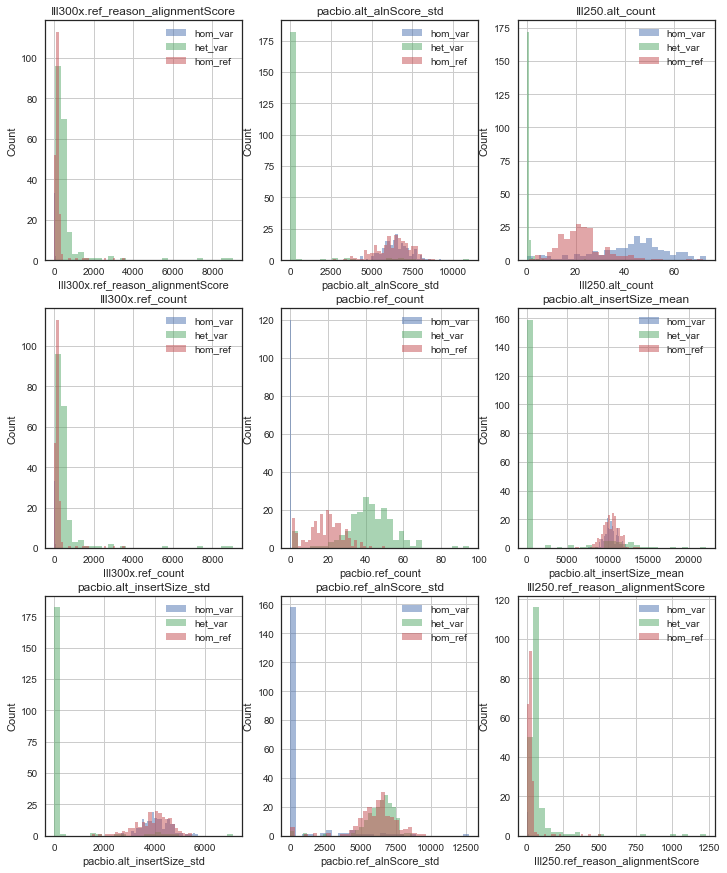

In [12]:
fig = plt.figure(figsize=(12,15))

# Feature 1 - Range adjusted to show distribution!!!
ax1 = fig.add_subplot(331)
ax1.grid(False)
hom_var_1.hist(alpha = 0.5, bins = 30, label='hom_var')
ax1.set_xlabel('Ill300x.ref_reason_alignmentScore')
ax1.set_ylabel('Count')
ax1.set_title('Ill300x.ref_reason_alignmentScore')

ax1 = fig.add_subplot(331)
het_var_1.hist(alpha = 0.5, bins = 30, label='het_var')

ax1 = fig.add_subplot(331)
hom_ref_1.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 2
ax2 = fig.add_subplot(332)
hom_var_2.hist(alpha = 0.5, bins = 30, label='hom_var')
ax2.set_xlabel('pacbio.alt_alnScore_std')
ax2.set_ylabel('Count')
ax2.set_title('pacbio.alt_alnScore_std')

ax2 = fig.add_subplot(332)
het_var_2.hist(alpha = 0.5, bins = 30, label='het_var')

ax2 = fig.add_subplot(332)
hom_ref_2.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 3
ax3 = fig.add_subplot(333)
hom_var_3.hist(alpha = 0.5, bins = 30, label='hom_var')
ax3.set_xlabel('Ill250.alt_count')
ax3.set_ylabel('Count')
ax3.set_title('Ill250.alt_count')

ax3 = fig.add_subplot(333)
het_var_3.hist(alpha = 0.5, bins = 30, label='het_var')

ax3 = fig.add_subplot(333)
hom_ref_3.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 4
ax4 = fig.add_subplot(334)
hom_var_4.hist(alpha = 0.5, bins = 30, label='hom_var')
ax4.set_xlabel('Ill300x.ref_count')
ax4.set_ylabel('Count')
ax4.set_title('Ill300x.ref_count')

ax4 = fig.add_subplot(334)
het_var_4.hist(alpha = 0.5, bins = 30, label='het_var')

ax4 = fig.add_subplot(334)
hom_ref_4.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 5
ax5 = fig.add_subplot(335)
hom_var_5.hist(alpha = 0.5, bins = 30, label='hom_var')
ax5.set_xlabel('pacbio.ref_count')
ax5.set_ylabel('Count')
ax5.set_title('pacbio.ref_count')

ax5 = fig.add_subplot(335)
het_var_5.hist(alpha = 0.5, bins = 30, label='het_var')

ax5 = fig.add_subplot(335)
hom_ref_5.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 6
ax6 = fig.add_subplot(336)
hom_var_6.hist(alpha = 0.5, bins = 30, label='hom_var')
ax6.set_xlabel('pacbio.alt_insertSize_mean')
ax6.set_ylabel('Count')
ax6.set_title('pacbio.alt_insertSize_mean')

ax6 = fig.add_subplot(336)
het_var_6.hist(alpha = 0.5, bins = 30, label='het_var')

ax6 = fig.add_subplot(336)
hom_ref_6.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 7
ax7 = fig.add_subplot(337)
hom_var_7.hist(alpha = 0.5, bins = 30, label='hom_var')
ax7.set_xlabel('pacbio.alt_insertSize_std')
ax7.set_ylabel('Count')
ax7.set_title('pacbio.alt_insertSize_std')

ax7 = fig.add_subplot(337)
het_var_7.hist(alpha = 0.5, bins = 30, label='het_var')

ax7 = fig.add_subplot(337)
hom_ref_7.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 8
ax8 = fig.add_subplot(338)
hom_var_8.hist(alpha = 0.5, bins = 30, label='hom_var')
ax8.set_xlabel('pacbio.ref_alnScore_std')
ax8.set_ylabel('Count')
ax8.set_title('pacbio.ref_alnScore_std')

ax8 = fig.add_subplot(338)
het_var_8.hist(alpha = 0.5, bins = 30, label='het_var')

ax8 = fig.add_subplot(338)
hom_ref_8.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 9 - NOTE: The range has been changed to see distribution!!
ax9 = fig.add_subplot(339)
hom_var_9.hist(alpha = 0.5, bins = 30, label='hom_var')
ax9.set_xlabel('Ill250.ref_reason_alignmentScore')
ax9.set_ylabel('Count')
ax9.set_title('Ill250.ref_reason_alignmentScore')

ax9 = fig.add_subplot(339)
het_var_9.hist(alpha = 0.5, bins = 30, label='het_var')

ax9 = fig.add_subplot(339)
hom_ref_9.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/top_10feat_.png', bbox_inches='tight')
plt.show()


In [13]:
# Nov 17 2017 Data

In [14]:
# Select Features for comparison
# Feature 1
hom_var_1 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.ref_count']
het_var_1 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.ref_count']
hom_ref_1 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.ref_count']

# Feature 2
hom_var_2 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill300x.ref_count']
het_var_2 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill300x.ref_count']
hom_ref_2 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill300x.ref_count']

# Feature 3
hom_var_3 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_alnScore_std']
het_var_3 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_alnScore_std']
hom_ref_3 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_alnScore_std']

# Feature 4
hom_var_4 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill250.alt_count']
het_var_4 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill250.alt_count']
hom_ref_4 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill250.alt_count']

# Feature 5
hom_var_5 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_insertSize_std']
het_var_5 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_insertSize_std']
hom_ref_5 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_insertSize_std']

# Feature 6
hom_var_6 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill300x.ref_reason_alignmentScore']
het_var_6 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill300x.ref_reason_alignmentScore']
hom_ref_6 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill300x.ref_reason_alignmentScore']

# Feature 7
hom_var_7 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_reason_alignmentScore']
het_var_7 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_reason_alignmentScore']
hom_ref_7 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_reason_alignmentScore']

# Feature 8
hom_var_8 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_count']
het_var_8 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_count']
hom_ref_8 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_count']

# Feature 9
hom_var_9 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.alt_insertSize_mean']
het_var_9 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.alt_insertSize_mean']
hom_ref_9 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.alt_insertSize_mean']

# Feature 10
hom_var_10 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['Ill250.ref_reason_alignmentScore']
het_var_10 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['Ill250.ref_reason_alignmentScore']
hom_ref_10 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['Ill250.ref_reason_alignmentScore']

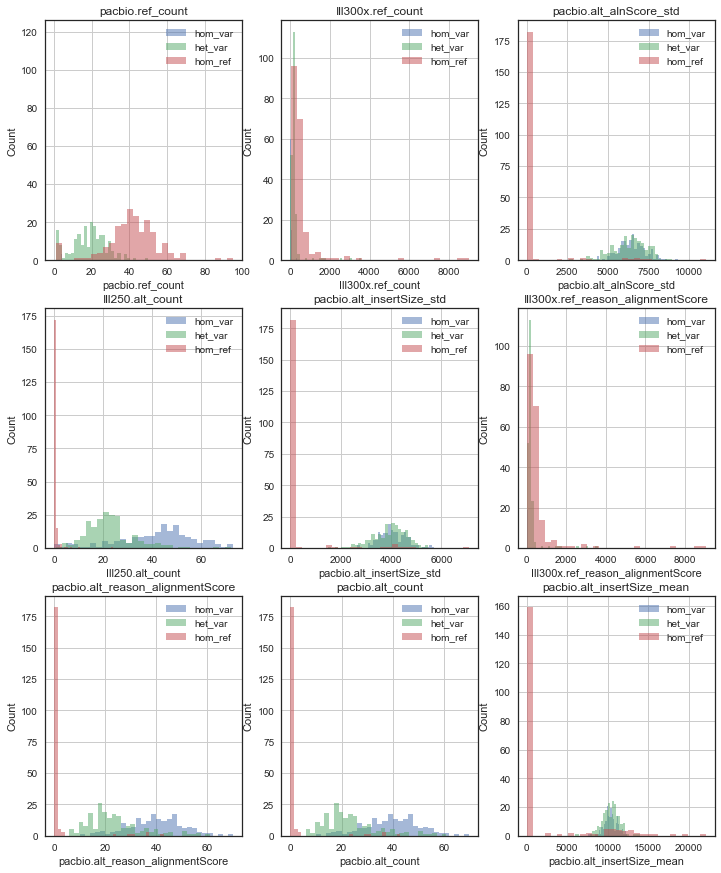

In [15]:
fig = plt.figure(figsize=(12,15))

# Feature 1 
ax1 = fig.add_subplot(331)
hom_var_1.hist(alpha = 0.5, bins = 30, label='hom_var')
ax1.set_xlabel('pacbio.ref_count')
ax1.set_ylabel('Count')
ax1.set_title('pacbio.ref_count')

ax1 = fig.add_subplot(331)
het_var_1.hist(alpha = 0.5, bins = 30, label='het_var')

ax1 = fig.add_subplot(331)
hom_ref_1.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 2
ax2 = fig.add_subplot(332)
hom_var_2.hist(alpha = 0.5, bins = 30, label='hom_var')
ax2.set_xlabel('Ill300x.ref_count')
ax2.set_ylabel('Count')
ax2.set_title('Ill300x.ref_count')

ax2 = fig.add_subplot(332)
het_var_2.hist(alpha = 0.5, bins = 30, label='het_var')

ax2 = fig.add_subplot(332)
hom_ref_2.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 3
ax3 = fig.add_subplot(333)
hom_var_3.hist(alpha = 0.5, bins = 30, label='hom_var')
ax3.set_xlabel('pacbio.alt_alnScore_std')
ax3.set_ylabel('Count')
ax3.set_title('pacbio.alt_alnScore_std')

ax3 = fig.add_subplot(333)
het_var_3.hist(alpha = 0.5, bins = 30, label='het_var')

ax3 = fig.add_subplot(333)
hom_ref_3.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 4
ax4 = fig.add_subplot(334)
hom_var_4.hist(alpha = 0.5, bins = 30, label='hom_var')
ax4.set_xlabel('Ill250.alt_count')
ax4.set_ylabel('Count')
ax4.set_title('Ill250.alt_count')

ax4 = fig.add_subplot(334)
het_var_4.hist(alpha = 0.5, bins = 30, label='het_var')

ax4 = fig.add_subplot(334)
hom_ref_4.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 5
ax5 = fig.add_subplot(335)
hom_var_5.hist(alpha = 0.5, bins = 30, label='hom_var')
ax5.set_xlabel('pacbio.alt_insertSize_std')
ax5.set_ylabel('Count')
ax5.set_title('pacbio.alt_insertSize_std')

ax5 = fig.add_subplot(335)
het_var_5.hist(alpha = 0.5, bins = 30, label='het_var')

ax5 = fig.add_subplot(335)
hom_ref_5.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 6
ax6 = fig.add_subplot(336)
hom_var_6.hist(alpha = 0.5, bins = 30, label='hom_var')
ax6.set_xlabel('Ill300x.ref_reason_alignmentScore')
ax6.set_ylabel('Count')
ax6.set_title('Ill300x.ref_reason_alignmentScore')

ax6 = fig.add_subplot(336)
het_var_6.hist(alpha = 0.5, bins = 30, label='het_var')

ax6 = fig.add_subplot(336)
hom_ref_6.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 7
ax7 = fig.add_subplot(337)
hom_var_7.hist(alpha = 0.5, bins = 30, label='hom_var')
ax7.set_xlabel('pacbio.alt_reason_alignmentScore')
ax7.set_ylabel('Count')
ax7.set_title('pacbio.alt_reason_alignmentScore')

ax7 = fig.add_subplot(337)
het_var_7.hist(alpha = 0.5, bins = 30, label='het_var')

ax7 = fig.add_subplot(337)
hom_ref_7.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 8
ax8 = fig.add_subplot(338)
hom_var_8.hist(alpha = 0.5, bins = 30, label='hom_var')
ax8.set_xlabel('pacbio.alt_count')
ax8.set_ylabel('Count')
ax8.set_title('pacbio.alt_count')

ax8 = fig.add_subplot(338)
het_var_8.hist(alpha = 0.5, bins = 30, label='het_var')

ax8 = fig.add_subplot(338)
hom_ref_8.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 9 
ax9 = fig.add_subplot(339)
hom_var_9.hist(alpha = 0.5, bins = 30, label='hom_var')
ax9.set_xlabel('pacbio.alt_insertSize_mean')
ax9.set_ylabel('Count')
ax9.set_title('pacbio.alt_insertSize_mean')

ax9 = fig.add_subplot(339)
het_var_9.hist(alpha = 0.5, bins = 30, label='het_var')

ax9 = fig.add_subplot(339)
hom_ref_9.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/top_10feat_.png', bbox_inches='tight')
plt.show()


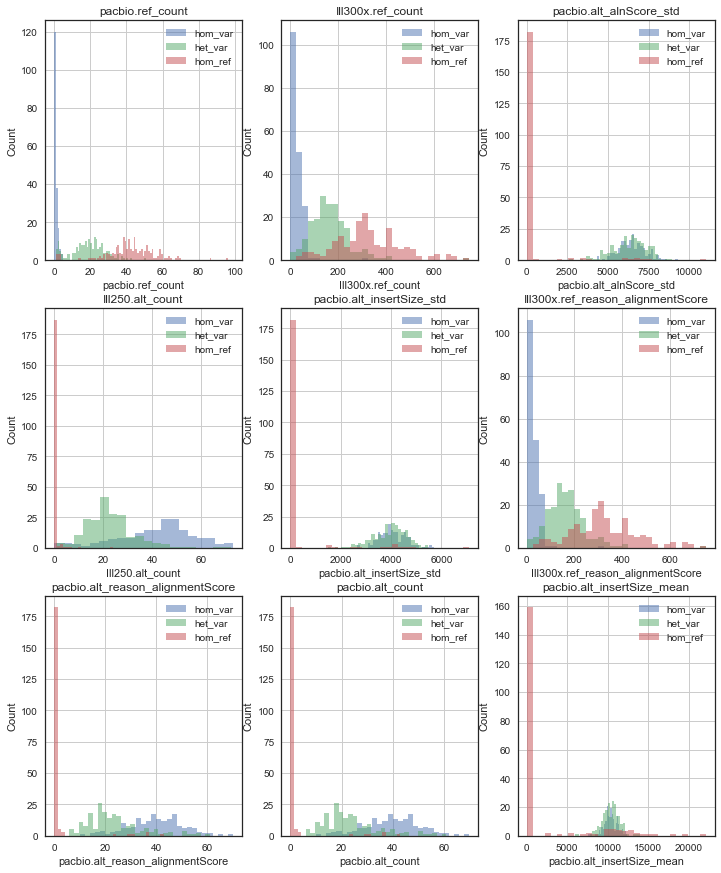

In [16]:
fig = plt.figure(figsize=(12,15))

# Feature 1 
ax1 = fig.add_subplot(331)
ax1.grid(False)
hom_var_1.hist(alpha = 0.5, bins = range(0,100), label='hom_var')
ax1.set_xlabel('pacbio.ref_count')
ax1.set_ylabel('Count')
ax1.set_title('pacbio.ref_count')

ax1 = fig.add_subplot(331)
het_var_1.hist(alpha = 0.5, bins = range(0,100), label='het_var')

ax1 = fig.add_subplot(331)
hom_ref_1.hist(alpha = 0.5, bins = range(0,100), label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 2
ax2 = fig.add_subplot(332)
hom_var_2.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_var')
ax2.set_xlabel('Ill300x.ref_count')
ax2.set_ylabel('Count')
ax2.set_title('Ill300x.ref_count')

ax2 = fig.add_subplot(332)
het_var_2.hist(alpha = 0.5, bins = 30, range=(0, 750), label='het_var')

ax2 = fig.add_subplot(332)
hom_ref_2.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 3
ax3 = fig.add_subplot(333)
hom_var_3.hist(alpha = 0.5, bins = 30, label='hom_var')
ax3.set_xlabel('pacbio.alt_alnScore_std')
ax3.set_ylabel('Count')
ax3.set_title('pacbio.alt_alnScore_std')

ax3 = fig.add_subplot(333)
het_var_3.hist(alpha = 0.5, bins = 30, label='het_var')

ax3 = fig.add_subplot(333)
hom_ref_3.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')


# Feature 4
ax4 = fig.add_subplot(334)
hom_var_4.hist(alpha = 0.5, bins = 20, label='hom_var')
ax4.set_xlabel('Ill250.alt_count')
ax4.set_ylabel('Count')
ax4.set_title('Ill250.alt_count')

ax4 = fig.add_subplot(334)
het_var_4.hist(alpha = 0.5, bins = 20, label='het_var')

ax4 = fig.add_subplot(334)
hom_ref_4.hist(alpha = 0.5, bins = 20, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 5
ax5 = fig.add_subplot(335)
hom_var_5.hist(alpha = 0.5, bins = 30, label='hom_var')
ax5.set_xlabel('pacbio.alt_insertSize_std')
ax5.set_ylabel('Count')
ax5.set_title('pacbio.alt_insertSize_std')

ax5 = fig.add_subplot(335)
het_var_5.hist(alpha = 0.5, bins = 30, label='het_var')

ax5 = fig.add_subplot(335)
hom_ref_5.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 6
ax6 = fig.add_subplot(336)
hom_var_6.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_var')
ax6.set_xlabel('Ill300x.ref_reason_alignmentScore')
ax6.set_ylabel('Count')
ax6.set_title('Ill300x.ref_reason_alignmentScore')

ax6 = fig.add_subplot(336)
het_var_6.hist(alpha = 0.5, bins = 30, range=(0, 750), label='het_var')

ax6 = fig.add_subplot(336)
hom_ref_6.hist(alpha = 0.5, bins = 30, range=(0, 750), label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 7
ax7 = fig.add_subplot(337)
hom_var_7.hist(alpha = 0.5, bins = 30, label='hom_var')
ax7.set_xlabel('pacbio.alt_reason_alignmentScore')
ax7.set_ylabel('Count')
ax7.set_title('pacbio.alt_reason_alignmentScore')

ax7 = fig.add_subplot(337)
het_var_7.hist(alpha = 0.5, bins = 30, label='het_var')

ax7 = fig.add_subplot(337)
hom_ref_7.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 8
ax8 = fig.add_subplot(338)
hom_var_8.hist(alpha = 0.5, bins = 30, label='hom_var')
ax8.set_xlabel('pacbio.alt_count')
ax8.set_ylabel('Count')
ax8.set_title('pacbio.alt_count')

ax8 = fig.add_subplot(338)
het_var_8.hist(alpha = 0.5, bins = 30, label='het_var')

ax8 = fig.add_subplot(338)
hom_ref_8.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

# Feature 9 
ax9 = fig.add_subplot(339)
hom_var_9.hist(alpha = 0.5, bins = 30, label='hom_var')
ax9.set_xlabel('pacbio.alt_insertSize_mean')
ax9.set_ylabel('Count')
ax9.set_title('pacbio.alt_insertSize_mean')

ax9 = fig.add_subplot(339)
het_var_9.hist(alpha = 0.5, bins = 30, label='het_var')

ax9 = fig.add_subplot(339)
hom_ref_9.hist(alpha = 0.5, bins = 30, label='hom_ref')
plt.legend(loc = 'upper right')

plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/top_10feat_adj_.png', bbox_inches='tight')
plt.show()


**TODO**

[create subplots for each distribution](https://www.youtube.com/watch?v=v_sPnwoT_iA)

Also use to improve dotplots

In [17]:
df_ = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Oct272017_ML_w_AllTech/data/final_df/alldata_final_GTcons_df_DEL_SVanalyzer_100trees.csv')

In [18]:
# Feature 1
hom_var_1 = df_100_[df_100_['GTcons'] == 'Homozygous_Variant']['pacbio.ref_count']
het_var_1 = df_100_[df_100_['GTcons'] == 'Heterozygous_Variant']['pacbio.ref_count']
hom_ref_1 = df_100_[df_100_['GTcons'] == 'Homozygous_Reference']['pacbio.ref_count']

Ill300x_ref_00 = df_[(df_['predicted_GTcons_label'] == 0) & (df_['GTcons'] == 0)]['pacbio.ref_count']
Ill300x_ref_01 = df_[(df_['predicted_GTcons_label'] == 0) & (df_['GTcons'] == 1)]['pacbio.ref_count']
Ill300x_ref_02 = df_[(df_['predicted_GTcons_label'] == 0) & (df_['GTcons'] == 2)]['pacbio.ref_count']
Ill300x_alt_00 = df_[(df_['predicted_GTcons_label'] == 0) & (df_['GTcons'] == 0)]['pacbio.alt_count']
Ill300x_alt_01 = df_[(df_['predicted_GTcons_label'] == 0) & (df_['GTcons'] == 1)]['pacbio.alt_count']
Ill300x_alt_02 = df_[(df_['predicted_GTcons_label'] == 0) & (df_['GTcons'] == 2)]['pacbio.alt_count']


# Colors
size_ = df_['Size']

# Ill300x_ref = df_[df_['predicted_GTcons_label'] == 0 & ]
# Ill300x_ref = df_[df_['predicted_GTcons_label'] == 0 & ]

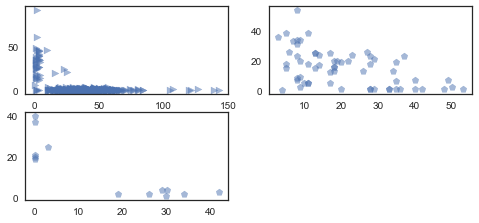

In [19]:
plt.subplot(321)
plt.scatter(Ill300x_ref_00, Ill300x_alt_00, marker=">", alpha = 0.5)

plt.subplot(322)
plt.scatter(Ill300x_ref_01, Ill300x_alt_01, marker=(5, 0), alpha = 0.5)

plt.subplot(323)
plt.scatter(Ill300x_ref_02, Ill300x_alt_02, marker=(5, 0), alpha = 0.5)
plt.show()


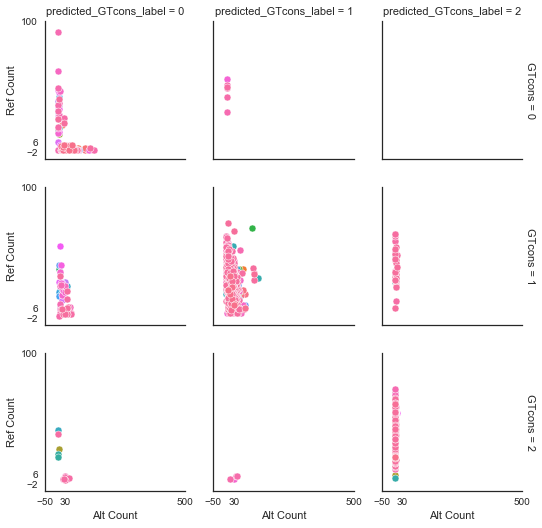

In [20]:
g = sns.FacetGrid(df_, row="GTcons", col="predicted_GTcons_label", margin_titles=True, size=2.5, hue = "Size")
g.map(plt.scatter, "pacbio.ref_count", "pacbio.alt_count", edgecolor="white", lw=.5);
g.set_axis_labels("Alt Count", "Ref Count");
g.set(xticks=[-50, 30, 500], yticks=[-2, 6, 100]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
plt.show(g)

In [21]:
df_["pacbio_ref_count"] = df_["pacbio.ref_count"] + 0.1
df_["pacbio_alt_count"] = df_["pacbio.alt_count"] + 0.1

df_['ref_log'] = np.log10(df_.pacbio_ref_count)
df_['alt_log'] = np.log10(df_.pacbio_alt_count)
# df_
# ins_Size.to_csv('ins_Size.csv', index=False)

# all_df_del['abs_size'] = all_df_del['Size'].abs()
# del_Size['log_size'] = np.log10(all_df_del.abs_size)
# print del_Size.head(3)
# del_Size.to_csv('del_Size.csv', index=False)

In [22]:
#Size Bins
bins = [0, 50, 100,500,1000,5000,10000,45516]
df_['Size'] = df_['Size'].abs()
group_names_size = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-45516']
df_['size_bin'] = pd.cut(df_['Size'], bins, labels=group_names_size)

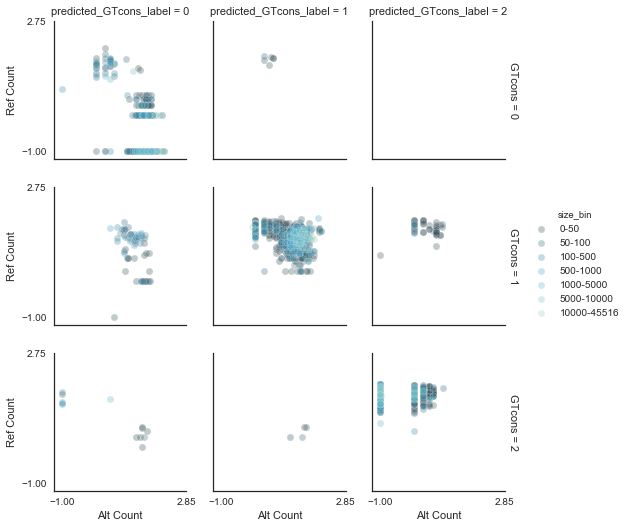

In [23]:
g = sns.FacetGrid(df_, row="GTcons", col="predicted_GTcons_label", margin_titles=True, size=2.5, hue = "size_bin", palette="GnBu_d")
g.map(plt.scatter, "ref_log", "alt_log", edgecolor="white", lw=.5, alpha=.3);
g.set_axis_labels("Alt Count", "Ref Count");
g.set(xticks=[-1, 2.85], yticks=[-1, 2.75]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
g.add_legend();
plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/PB_altRef_size.png', bbox_inches='tight')


plt.show(g)

In [24]:
#Size Bins
bins = [0, 0.25, 0.5,0.75, 1]
group_names_size = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']
df_['TR_bin'] = pd.cut(df_['tandemrep_pct'], bins, labels=group_names_size)

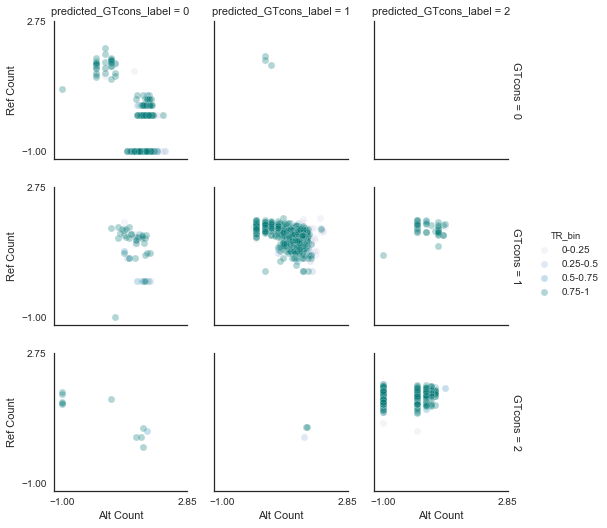

In [25]:
g = sns.FacetGrid(df_, row="GTcons", col="predicted_GTcons_label", margin_titles=True, size=2.5, hue = "TR_bin", palette="PuBuGn")
g.map(plt.scatter, "ref_log", "alt_log", edgecolor="white", lw=.5, alpha=.3);
g.set_axis_labels("Alt Count", "Ref Count");
g.set(xticks=[-1, 2.85], yticks=[-1, 2.75]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
g.add_legend();
plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/PB_altRef_TR.png', bbox_inches='tight')


plt.show(g)

In [26]:
df_["Ill300x_ref_count"] = df_["Ill300x.ref_count"] + 0.1
df_["Ill300x_alt_count"] = df_["Ill300x.alt_count"] + 0.1

df_['ref_log'] = np.log10(df_.Ill300x_ref_count)
df_['alt_log'] = np.log10(df_.Ill300x_alt_count)
# df_
# ins_Size.to_csv('ins_Size.csv', index=False)

# all_df_del['abs_size'] = all_df_del['Size'].abs()
# del_Size['log_size'] = np.log10(all_df_del.abs_size)
# print del_Size.head(3)
# del_Size.to_csv('del_Size.csv', index=False)

In [27]:
#Size Bins
bins = [0, 50, 100,500,1000,5000,10000,45516]
df_['Size'] = df_['Size'].abs()
group_names_size = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-45516']
df_['size_bin'] = pd.cut(df_['Size'], bins, labels=group_names_size)

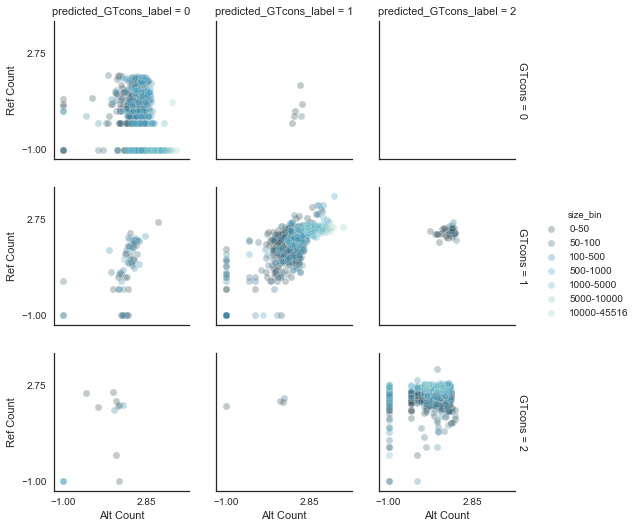

In [28]:
g = sns.FacetGrid(df_, row="GTcons", col="predicted_GTcons_label", margin_titles=True, size=2.5, hue = "size_bin", palette="GnBu_d")
g.map(plt.scatter, "ref_log", "alt_log", edgecolor="white", lw=.5, alpha=.3);
g.set_axis_labels("Alt Count", "Ref Count");
g.set(xticks=[-1, 2.85], yticks=[-1, 2.75]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
g.add_legend();
plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/300x_altRef_size.png', bbox_inches='tight')


plt.show(g)

In [29]:
#Size Bins
bins = [0, 0.25, 0.5,0.75, 1]
group_names_size = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']
df_['TR_bin'] = pd.cut(df_['tandemrep_pct'], bins, labels=group_names_size)

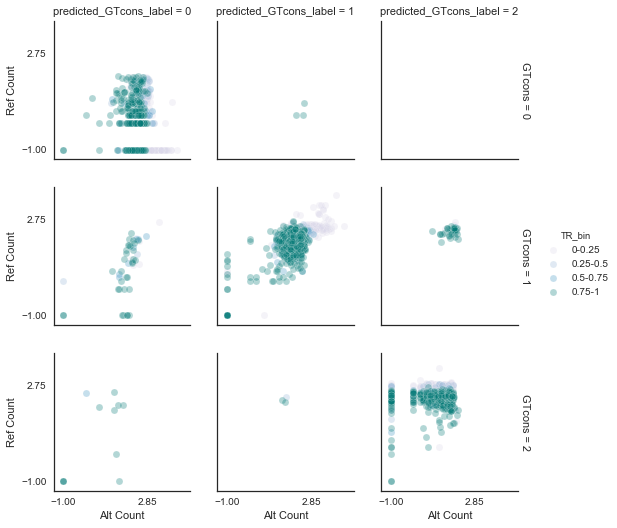

In [30]:
g = sns.FacetGrid(df_, row="GTcons", col="predicted_GTcons_label", margin_titles=True, size=2.5, hue = "TR_bin", palette="PuBuGn")
g.map(plt.scatter, "ref_log", "alt_log", edgecolor="white", lw=.5, alpha=.3);
g.set_axis_labels("Alt Count", "Ref Count");
g.set(xticks=[-1, 2.85], yticks=[-1, 2.75]);
g.fig.subplots_adjust(wspace=.2, hspace=.2);
g.add_legend();
plt.savefig('/Volumes/lesleydata/SVanalyzer_ML/Nov172017_EDA/combined_histo/300x_altRef_TR.png', bbox_inches='tight')


plt.show(g)

In [31]:
p = Histogram(df_100_, values='Ill250.alt_reason_alignmentScore', color='GTcons', bins=123,
              title="Ill250.alt_reason_alignmentScore",
              legend='top_right')

output_file("Ill250.alt_reason_alignmentScore_histo.html")

show(p)

In [32]:
p = Histogram(df_3, values='pacbio.ref_count', color='GTcons', bins=48,
              title="PB: Reference Count",
              legend='top_right')

output_file("PB.ref_count_histo.html")

show(p)

NameError: name 'df_3' is not defined

In [ ]:
p = Histogram(df_3, values='Ill250.alt_count', color='GTcons', bins=30
              ,
              title="GTcons Label Distribution: Illumnia 250bp alternate read count [Ill250.alt_count]",
              legend='top_right')

output_file("Ill250.alt_count_histo.html")

show(p)

**NOTE: Differing bin width**
    
[If all values are equal, the result is a single bin with arbitrary width](http://bokeh.pydata.org/en/0.12.0/docs/reference/charts.html)    
    

[Pair plot Resource](https://www.youtube.com/watch?v=cpZExlOKFH4)

**Variables that total 0.8627**

In [ ]:
df_feat = df[['Ill300x.ref_count','pacbio.ref_reason_alignmentScore','Ill300x.ref_reason_alignmentScore','Ill250.alt_count','Ill250.alt_reason_alignmentScore','pacbio.ref_count','Ill250.ref_reason_alignmentScore','Ill250.ref_count','pacbio.alt_count','pacbio.alt_reason_alignmentScore','Ill250.alt_insertSize_std','pacbio.ref_insertSize_std','Ill250.alt_alnScore_std','pacbio.ref_alnScore_std','Ill300x.alt_count','Ill300x.alt_reason_alignmentScore','pacbio.alt_insertSize_std','pacbio.alt_alnScore_std','Ill300x.alt_insertSize_std','Ill250.alt_insertSize_mean','pacbio.alt_insertSize_mean','Ill250.alt_alnScore_mean','pacbio.ref_insertSize_mean','IllMP.ref_reason_alignmentScore','pacbio.ref_alnScore_mean','IllMP.ref_count','IllMP.alt_insertSize_mean','Ill250.ref_insertSize_std','IllMP.alt_reason_alignmentScore','IllMP.ref_alnScore_std','pacbio.alt_alnScore_mean','IllMP.alt_alnScore_mean', 'GTcons']]

In [ ]:
g = sns.pairplot(df_feat, hue="GTcons")
plt.show

In [ ]:
sns.pairplot(df_feat, hue="GTcons")

In [ ]:
plt.show(g)

In [ ]:
g